<a href="https://colab.research.google.com/github/knyk0/BlackJackQLearning/blob/main/Nicolas_Aviles_Blackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Blackjack Solver**
---

In this lab you will use Q-Learning to create a Blackjack solver. Remeber the player has 19 options or cards combinations and totals they can have and the dealer has 10. We will only have the actions of hit or stand.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
import time



1.   Initalize Q-Table with random values
2.   Create a lot of games to play through over and over
3.   Each game deal hands to the player and the dealer
4.   Based on a random number either "explore" by chooing a random action or "exploitation" by choosing the "best" option according to our Q-Table
5.   Update the Q-Table using Q-Function
6.   Play another game


**Q-Function**

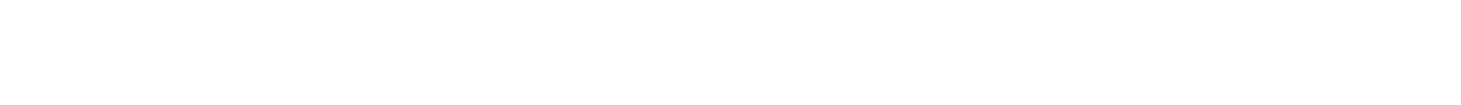

In [ ]:
num_states = 190  # 19 player options * 10 dealer visible options
num_actions = 2  # Hit or Stand
wins = 0
ties = 0
losses = 0

# Initialize Q-table with random values
Q_table = np.random.uniform(low=-1, high=1, size=(num_states, num_actions))

def deal_initial_hands():
    # Simplified example, replace with your actual logic
    player_hand_value = np.random.choice(range(1, 20))  # Simplified player options
    player_hand_soft = False  # Example boolean indicating if the hand is soft
    player_hand = (player_hand_value, player_hand_soft)  # Create a tuple
    # Call get_state function with player_hand as a tuple
    dealer_showing = np.random.choice(range(1, 11))  # Dealer showing card
    return player_hand, dealer_showing

def choose_action(state, epsilon):
    if np.random.rand() < epsilon:  # Explore
        return np.random.choice([0, 1])  # Random action: Hit or Stand
    else:  # Exploit
        return np.argmax(Q_table[state])  # Best action according to Q-table

def update_q_table(prev_state, action, reward, next_state, alpha, gamma):
    best_next_action = np.argmax(Q_table[next_state])  # Best future action
    td_target = reward + gamma * Q_table[next_state][best_next_action]
    td_delta = td_target - Q_table[prev_state][action]
    Q_table[prev_state][action] += alpha * td_delta

def get_state(player_hand, dealer_showing):
    player_value, is_soft = player_hand
    dealer_value = dealer_showing

    # Example of mapping to a state based on player's hand value and softness.
    # Adjust this logic according to how you define the 19 player states.
    if is_soft:
        if player_value <= 17:
            state = 0  # Example state for soft hands <= 17
        elif 18 <= player_value <= 21:
            state = 1  # Example state for soft hands 18-21
    else:  # Hard hands
        if player_value <= 11:
            state = 2  # Example state for hard hands <= 11
        elif 12 <= player_value <= 16:
            state = 3  # Example state for hard hands 12-16
        elif 17 <= player_value <= 21:
            state = 4  # Example state for hard hands 17-21

    # Adjust for dealer showing. This simplistic model doesn't fully account for the dealer's card
    # in state determination beyond recognizing it as a factor.
    # You might need to expand this logic based on how dealer_showing influences the state.
    dealer_adjustment = 0
    if dealer_value >= 7:
        dealer_adjustment = 5  # Adjusting the state index based on dealer showing

    return state + dealer_adjustment

def play_step(state, action, player_hand, dealer_hand):
    global wins
    global ties
    global losses
    done = False
    reward = 0

    # Unpack player hand tuple
    player_value, is_soft = player_hand

    # Assume a simplified version where each hit adds a fixed amount (e.g., 2) to the hand value.
    # In a real implementation, this would be replaced with drawing a card from a deck.
    if action == 0:  # Player chooses to hit
        player_value += 2  # Simplified assumption
        if player_value > 21:  # Player busts
            reward = -1
            losses += 1
            done = True
        elif player_value == 21:  # Player hits 21
            reward = 1
            wins += 1
            done = True
    else:  # Player stands
        #while dealer_hand < 17:  # Dealer hits until their hand value is 17 or more
            #dealer_hand += 2  # Simplified assumption
        if dealer_hand > 21 or dealer_hand < player_value:  # Dealer busts or has less than player
            reward = 1
            wins += 1
        elif dealer_hand == player_value:  # Tie
            reward = 0
            ties += 1
        else:  # Dealer wins
            reward = -1
            losses += 1
        done = True

    # Calculate the next state based on the updated player hand and a simplified dealer showing.
    # In a real game, the dealer's showing card wouldn't change unless they had only one card initially.
    next_state = get_state((player_value, is_soft), dealer_hand if dealer_hand < 17 else 10)  # Simplifying assumption
    return next_state, reward, done

Visualize the Q-Table

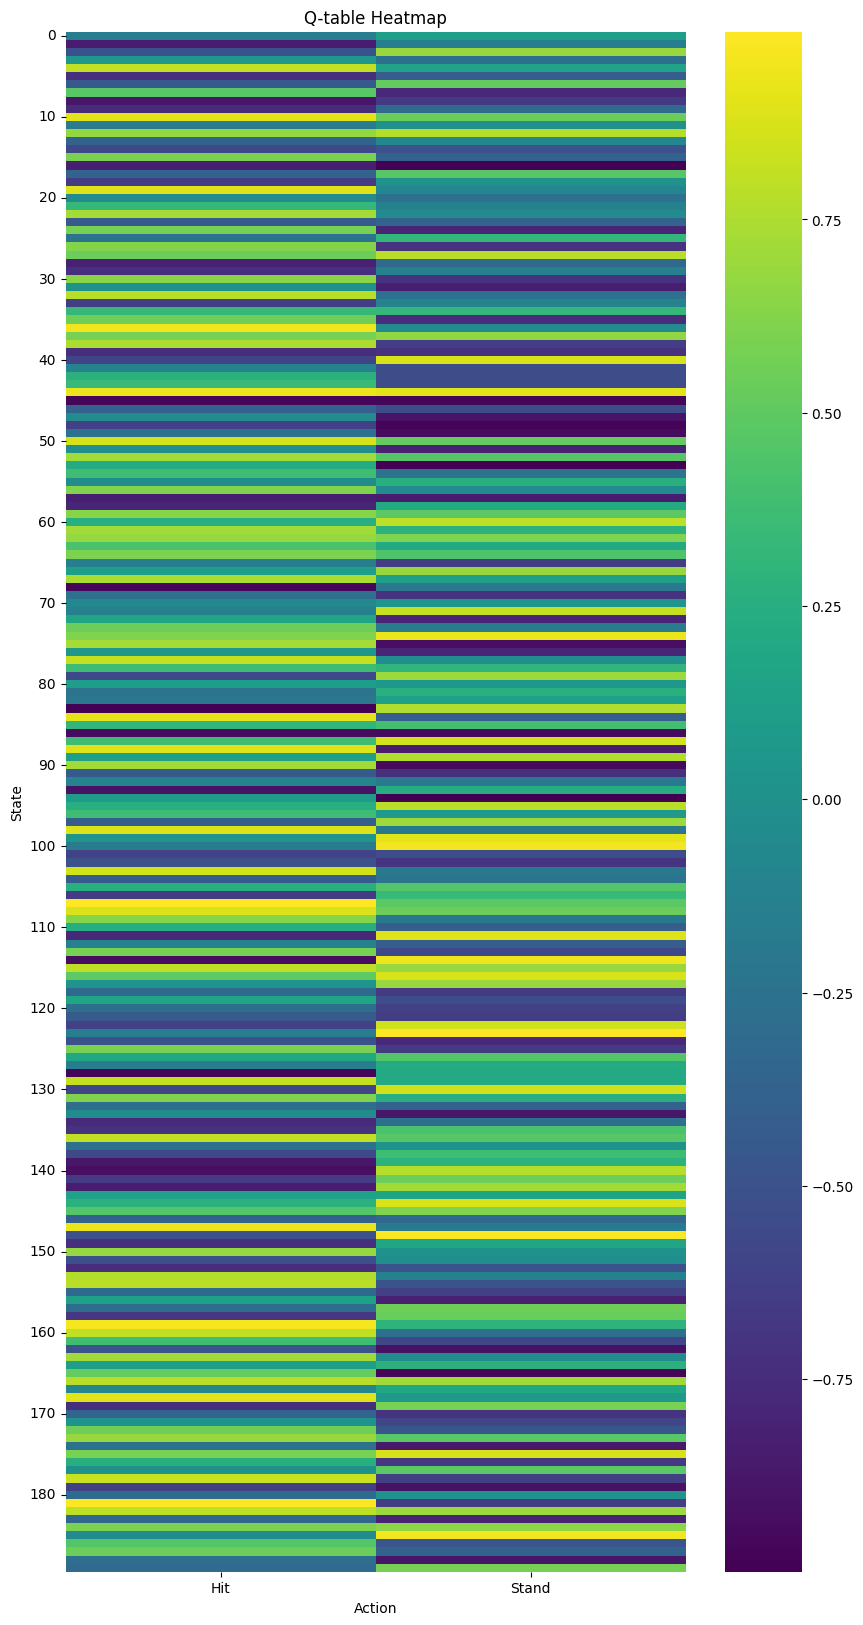

In [ ]:
plt.figure(figsize=(10, 20))

# Create a heatmap
ax = sns.heatmap(Q_table, cmap="viridis", yticklabels=10)
ax.set_title('Q-table Heatmap')
ax.set_xlabel('Action')
ax.set_ylabel('State')
ax.set_xticklabels(['Hit', 'Stand'])

# Improve visibility
plt.yticks(rotation=0)
plt.show()

Play a game only using the Q-Table and see the results.

Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Episode: 10000


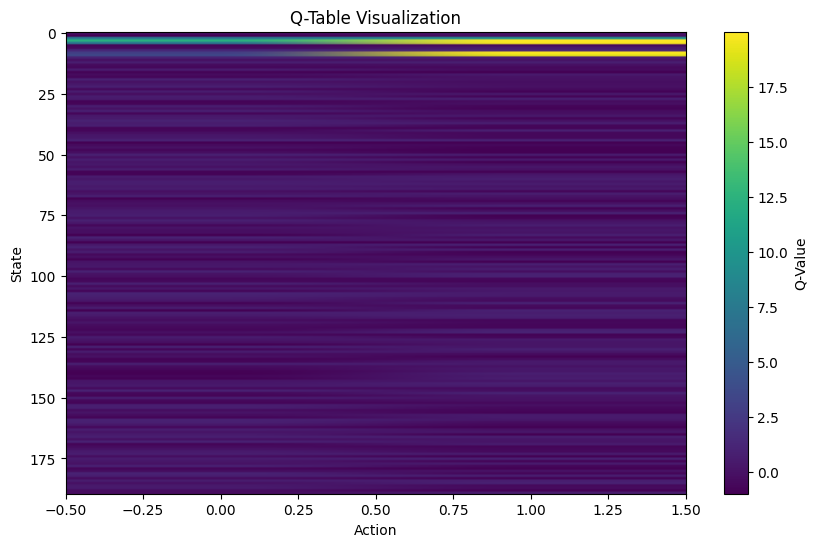

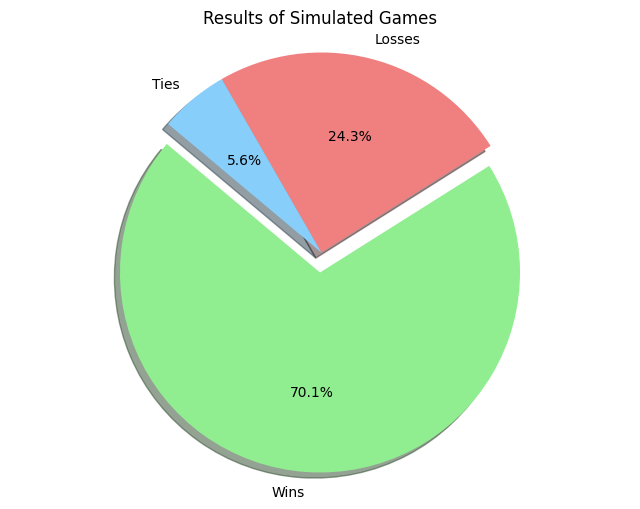

In [ ]:
epsilon = 1.0  # Exploration rate (1.0 default)
epsilon_min = 0.01 #(0.01 default)
epsilon_decay = 0.995 #(0.995 default)
alpha = 0.1  # Learning rate (0.1 default)
gamma = 0.95  # Discount factor (0.95 default)

wins = 0
ties = 0
losses = 0

for episode in range(1, 10001):  # Number of games to play
    player_hand, dealer_showing = deal_initial_hands()
    state = get_state(player_hand, dealer_showing)  # Implement this based on your state definitions

    done = False
    while not done:
        action = choose_action(state, epsilon)
        state = get_state(player_hand, dealer_showing)
        next_state, reward, done = play_step(state,action,player_hand,dealer_showing)  # Implement play_step to simulate game step
        update_q_table(state, action, reward, next_state, alpha, gamma)
        state = next_state

    # Decay epsilon
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    if episode % 1000 == 0:
        print(f"Episode: {episode}")

plt.figure(figsize=(10, 6))
plt.imshow(Q_table, cmap='viridis', aspect='auto')
plt.title('Q-Table Visualization')
plt.xlabel('Action')
plt.ylabel('State')
plt.colorbar(label='Q-Value')
plt.show()

# Visualization of simulation results
labels = ['Wins', 'Losses', 'Ties']
sizes = [wins, losses, ties]
colors = ['lightgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # explode the 1st slice (Wins)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Results of Simulated Games')
plt.show()